---

# <b> 창원 AI 아카데미: 데이터 분석 해커톤

* 일시: 2023년 7월 10일 ~ 12일
* 참가자: 백종환 </b>

<br>

---

---
# <b> * 문제 * </b>

### <b> *2012년부터 2021년까지의 창원시 표준지공시지가를 이용하여 2022년 창원시 표준지공시지가를 예측하시오.* </b>
---

## <b> 1. 데이터 전처리 </b>

> 필요 **라이브러리** 호출

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.offline import iplot, init_notebook_mode


from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [11]:
# import chart-studio and plotly.graph_objs

import chart_studio.plotly as py
import plotly.graph_objs as go

# import cufflinks and set the global theme

import cufflinks as cf
cf.set_config_file(world_readable=True, theme='pearl', offline=True)

# display all cell outputs

from IPython.core.interactiveshell import InteractiveShell

# plotly + cufflinks in offline mode

from plotly.offline import iplot
cf.go_offline()

In [12]:
# import plotly standard

import plotly.plotly as py

import plotly.graph_objs as go

import plotly.figure_factory as ff



# Cufflinks wrapper on plotly

import cufflinks as cf



# Display all cell outputs

from IPython.core.interactiveshell import InteractiveShell



# plotly + cufflinks in offline mode

from plotly.offline import iplot

cf.go_offline()



# set the global theme

cf.set_config_file(world_readable=True, theme='pearl', offline=True)

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


### 파일 불러오기
> 다수의 csv 파일에서 필요한 부분만 추출해서 하나로 합침.

In [3]:
df_list = []
for i in range(2012, 2022):
    if i == 2016:
        # df = pd.read_csv("2016년 표준지 공시지가.csv", encoding='cp949')
        df = pd.read_csv('/users/jjong/desktop/vscode/CWNU_ICT/창원AI아카데미(데이터분석 해커톤)/2016년 표준지 공시지가.csv', encoding='cp949')
        df['시도명'] = df['시도']
        df['시군구명'] = df['시군구.1']
        df['소재지'] = df['동리']
        df['지리적위치2'] = df['지리적위치']
        df['형상명'] = df['형상']
        df['지세명'] = df['지세']
        df['용도지역1'] = df['용도지역']
        df = df.drop(['시도', '시군구.1', '동리', '지리적위치', '형상', '지세', '용도지역', '읍면', '본번지.1', '부번지.1', '지번구분.1','부번지'], axis=1)
        df['연도'] = pd.to_datetime(i, format='%Y').year
        df_list.append(df)
    else:
        try:
            # df = pd.read_csv(f"{i}년 표준지 공시지가.csv", encoding='cp949')
            df = pd.read_csv(f'/users/jjong/desktop/vscode/CWNU_ICT/창원AI아카데미(데이터분석 해커톤)/{i}년 표준지 공시지가.csv', encoding='cp949')
            df['연도'] = pd.to_datetime(i, format='%Y').year
            df_list.append(df)
        except UnicodeDecodeError:
            # df = pd.read_csv(f"{i}년 표준지 공시지가.csv", encoding='utf-8')
            df = pd.read_csv(f'/users/jjong/desktop/vscode/CWNU_ICT/창원AI아카데미(데이터분석 해커톤)/{i}년 표준지 공시지가.csv', encoding='utf-8')
            df['연도'] = pd.to_datetime(i, format='%Y').year
            df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

In [4]:
data['연도'] = pd.to_datetime(data['연도'], format='%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020000 entries, 0 to 5019999
Data columns (total 23 columns):
 #   Column  Dtype         
---  ------  -----         
 0   일련번호    int64         
 1   시군구     int64         
 2   읍면동리    int64         
 3   지번구분    int64         
 4   본번지     object        
 5   부번지     object        
 6   시도명     object        
 7   시군구명    object        
 8   소재지     object        
 9   지목      object        
 10  면적      float64       
 11  용도지역1   object        
 12  용도지역2   object        
 13  이용상황    object        
 14  주위환경    object        
 15  지세명     object        
 16  형상명     object        
 17  도로교통    object        
 18  공시지가    int64         
 19  지리적위치1  object        
 20  지리적위치2  object        
 21  방위      object        
 22  연도      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(5), object(16)
memory usage: 880.9+ MB


In [5]:
filtered_data = data[(data['시도명'].str.contains('경상남도'))]
filtered_data = filtered_data[filtered_data['시군구명'].str.contains('창원')]
filtered_data

,일련번호,시군구,읍면동리,지번구분,본번지,부번지,시도명,시군구명,소재지,지목,...,이용상황,주위환경,지세명,형상명,도로교통,공시지가,지리적위치1,지리적위치2,방위,연도
431093,1,48121,10100,1,0006,0000,경상남도,창원의창구,북동 6,대,...,단독주택,기존 주택지대,완경사지,사다리형,세각(불),410000,북동공설시장,북동측인근,남향,2012-01-01
431094,2,48121,10100,1,0028,0000,경상남도,창원의창구,북동 28,대,...,다세대,기존 주택지대,평지,사다리형,소로한면,540000,창원향교,남서측인근,북향,2012-01-01
431095,3,48121,10100,1,0072,0000,경상남도,창원의창구,북동 72,대,...,단독주택,기존 주택지대,평지,부정형,세로(불),450000,북동공설시장,동측인근,북서향,2012-01-01
431096,4,48121,10100,1,0090,0002,경상남도,창원의창구,북동 90-2,대,...,단독주택,기존 주택지대,평지,부정형,소로한면,555000,북동공설시장,동측인근,남향,2012-01-01
431097,5,48121,10100,1,0100,0002,경상남도,창원의창구,북동 100-2,대,...,단독주택,기존 주택지대,평지,부정형,소로한면,590000,북동공설시장,동측인근,남향,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955755,1315,48129,16500,1,0839,0,경상남도,창원진해구,가주동 839,체육용지,...,골프장_회원제,순수 야산지대,완경사지,부정형,소로한면,67500,용원컨트리클럽,내,NaN,2021-01-01
4955756,1316,48129,16500,2,0008,0,경상남도,창원진해구,가주동 산8,임야,...,자연림,순수 산림지대,급경사지,부정형,맹지,3000,주포마을,북서측 근거리,남동향,2021-01-01
4955757,1317,48129,16500,2,0017,0,경상남도,창원진해구,가주동 산17,임야,...,자연림,순수 산림지대,완경사지,부정형,맹지,27500,주포마을,북측 인근,남동향,2021-01-01
4955758,1318,48129,16500,2,0070,0,경상남도,창원진해구,가주동 산70,임야,...,자연림,마을주변 야산지대,완경사지,부정형,세로(불),23000,주포마을,서측 근거리,남동향,2021-01-01


> <u>**결측치**</u> 확인 및 <u>**NaN**</u>이 다수 포함된 불필요한 열 삭제

In [6]:
df = filtered_data.iloc[:, 6:].copy()
df = df.drop(['용도지역2', '지리적위치1', '지리적위치2', '방위'], axis=1)
df

,시도명,시군구명,소재지,지목,면적,용도지역1,이용상황,주위환경,지세명,형상명,도로교통,공시지가,연도
431093,경상남도,창원의창구,북동 6,대,159.0,제1종일반주거지역,단독주택,기존 주택지대,완경사지,사다리형,세각(불),410000,2012-01-01
431094,경상남도,창원의창구,북동 28,대,182.0,제1종일반주거지역,다세대,기존 주택지대,평지,사다리형,소로한면,540000,2012-01-01
431095,경상남도,창원의창구,북동 72,대,162.0,제1종일반주거지역,단독주택,기존 주택지대,평지,부정형,세로(불),450000,2012-01-01
431096,경상남도,창원의창구,북동 90-2,대,147.0,제1종일반주거지역,단독주택,기존 주택지대,평지,부정형,소로한면,555000,2012-01-01
431097,경상남도,창원의창구,북동 100-2,대,180.0,제1종일반주거지역,단독주택,기존 주택지대,평지,부정형,소로한면,590000,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4955755,경상남도,창원진해구,가주동 839,체육용지,2473.0,자연녹지지역,골프장_회원제,순수 야산지대,완경사지,부정형,소로한면,67500,2021-01-01
4955756,경상남도,창원진해구,가주동 산8,임야,20628.0,보전녹지지역,자연림,순수 산림지대,급경사지,부정형,맹지,3000,2021-01-01
4955757,경상남도,창원진해구,가주동 산17,임야,5950.0,자연녹지지역,자연림,순수 산림지대,완경사지,부정형,맹지,27500,2021-01-01
4955758,경상남도,창원진해구,가주동 산70,임야,12298.0,자연녹지지역,자연림,마을주변 야산지대,완경사지,부정형,세로(불),23000,2021-01-01


## <b> 2. 탐색적 자료 분석 및 특징 선택</b>

split까지

### <u>지목</u>별 분석
> 박스플롯과 원그래프로 공시지가를 시각화하고 분석함.

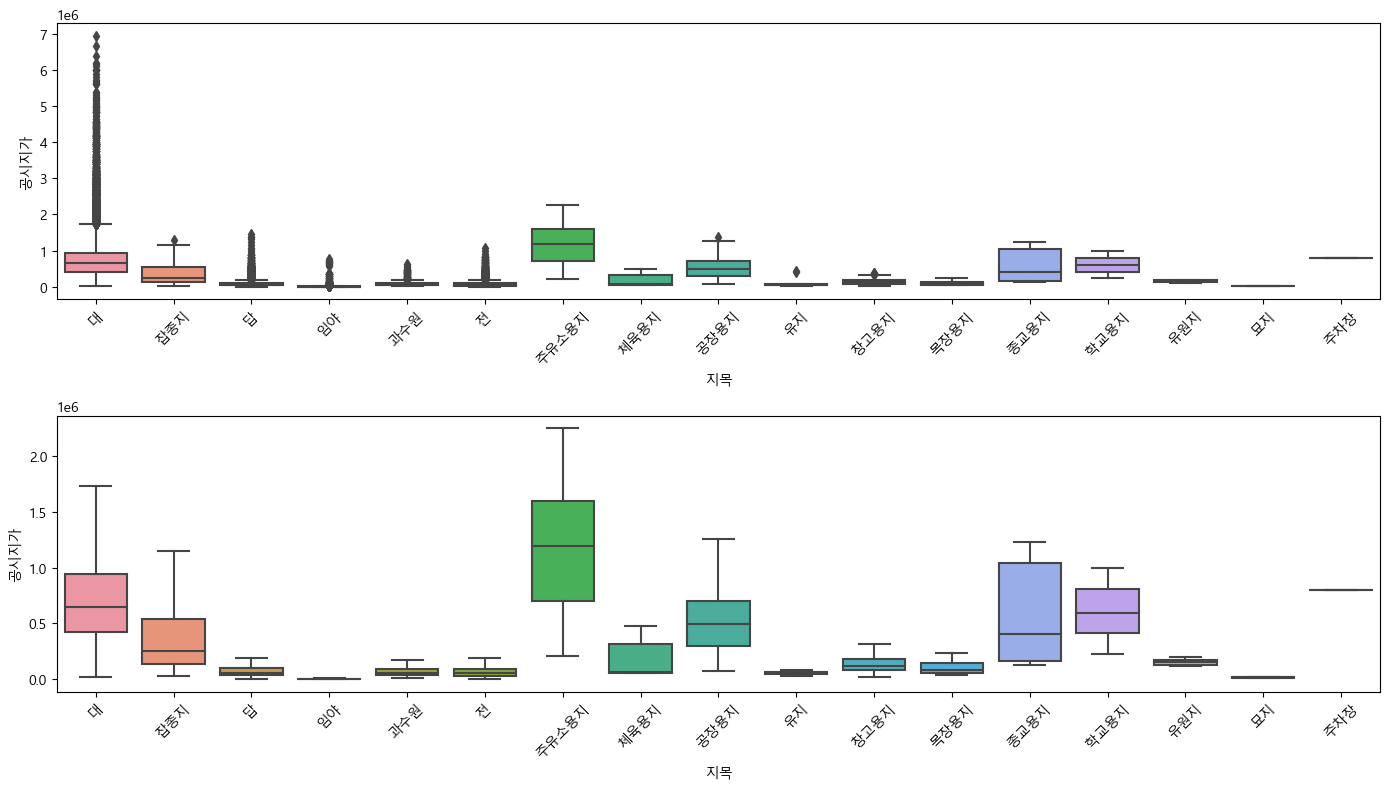

In [7]:
fig, axes = plt.subplots(2, 1, figsize=(14,8))
sns.boxplot(data=df, x='지목', y='공시지가', ax=axes[0])
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
sns.boxplot(data=df, x='지목', y='공시지가', showfliers=False, ax=axes[1])
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [13]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf
from IPython.core.interactiveshell import InteractiveShell
from plotly.offline import iplot
import chart_studio.plotly as py

cf.go_offline(connected=True)

# Display all cell outputs
InteractiveShell.ast_node_interactivity = "all"

# set the global theme
cf.set_config_file(world_readable=True, theme='pearl')

# 그래프 그리기
jimok_value = df['지목'].value_counts()

fig = go.Figure(data=[go.Pie(labels=df['지목'].unique(), values=jimok_value, hole=0.4)])
fig.update_layout(width=700, height=600, title={
    'text': '창원시 지목별 분포',
    'y': 0.95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top',
    'font': {'size': 20}
})

# 그래프 출력
iplot(fig)


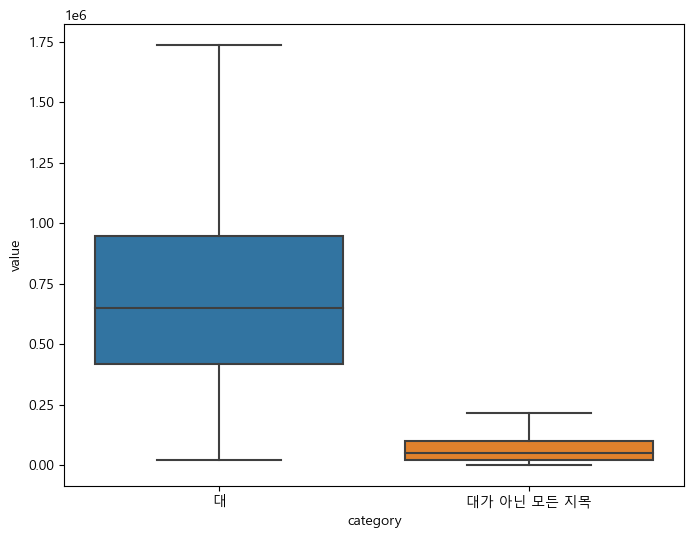

In [9]:
dae = df[df['지목'] == '대']['공시지가']
dae_not = df[df['지목'] != '대']['공시지가']
jimok = pd.DataFrame({'category': ['대'] * len(dae) + ['대가 아닌 모든 지목'] * len(dae_not),
                      'value': pd.concat([dae, dae_not])})

plt.figure(figsize=(8, 6))
sns.boxplot(data=jimok, x='category', y='value', showfliers=False)
plt.show()


In [10]:
jimok_year = df.groupby(['연도', '지목'])['공시지가'].mean().reset_index()
jimok_year['연도'] = pd.to_datetime(jimok_year['연도']).dt.year

# 그래프 그리기
fig = px.bar(jimok_year, x='지목', y='공시지가', animation_frame='연도', range_y=[0, max(jimok_year['공시지가'])],
             color='지목', labels={'지목': '지목', '공시지가': '공시지가'},
             title='지목별 공시지가 변화')
fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['A', 'B', 'C']},
                  title={
    'text': '지목별 공시지가 평균의 변화',
    'y': 0.95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top',
    'font': {'size': 20}
})
fig.update_layout()
fig.show()

### 용도지역별 분석

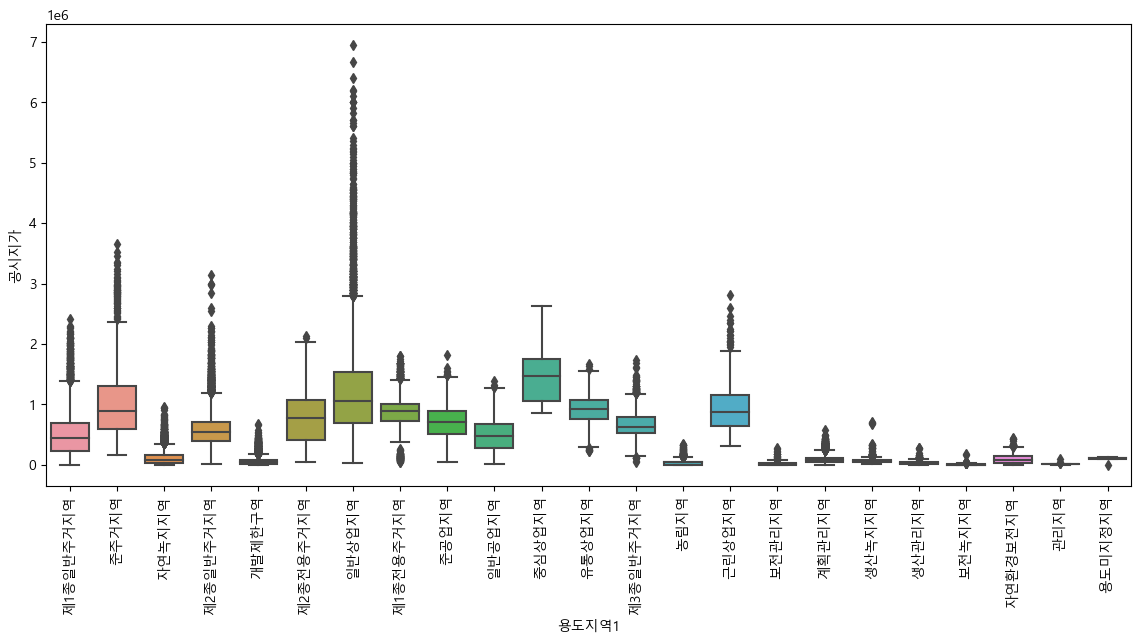

In [11]:
df['용도지역1']
plt.figure(figsize=(14,6))
sns.boxplot(data=df, x='용도지역1', y='공시지가')
plt.xticks(rotation=90)
plt.show()

In [34]:
yongdo_value = df['용도지역1'].value_counts()
fig = go.Figure(data=[go.Pie(labels=df['용도지역1'].unique(), values=yongdo_value, hole=0.4, pull=[0,0,0,0,0,0,0.2,0,0,0,0.2])])
fig.update_layout(width=800, height=650, title={
    'text': '창원시 용도지역별 분포',
    'y': 0.95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top',
    'font': {'size': 35}
})

fig.show()

In [25]:
yongdo_year = df.groupby(['연도', '용도지역1'])['공시지가'].mean().reset_index()
yongdo_year['연도'] = pd.to_datetime(yongdo_year['연도']).dt.year

# 그래프 그리기
fig = px.bar(yongdo_year, x='용도지역1', y='공시지가', animation_frame='연도', range_y=[0, max(yongdo_year['공시지가'])],
             color='용도지역1', labels={'용도지역1': '용도지역', '공시지가': '공시지가'},
             title='지목별 공시지가 변화')
fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['A', 'B', 'C']},
                  title={
    'text': '용도지역별 공시지가 평균의 변화',
    'y': 0.95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top',
    'font': {'size': 35}
})
fig.update_layout()
fig.show()

### 지세, 형상, 도로교통에 따른 분석
> 세 가지의 조건으로 공시지가 분석 및 그래프

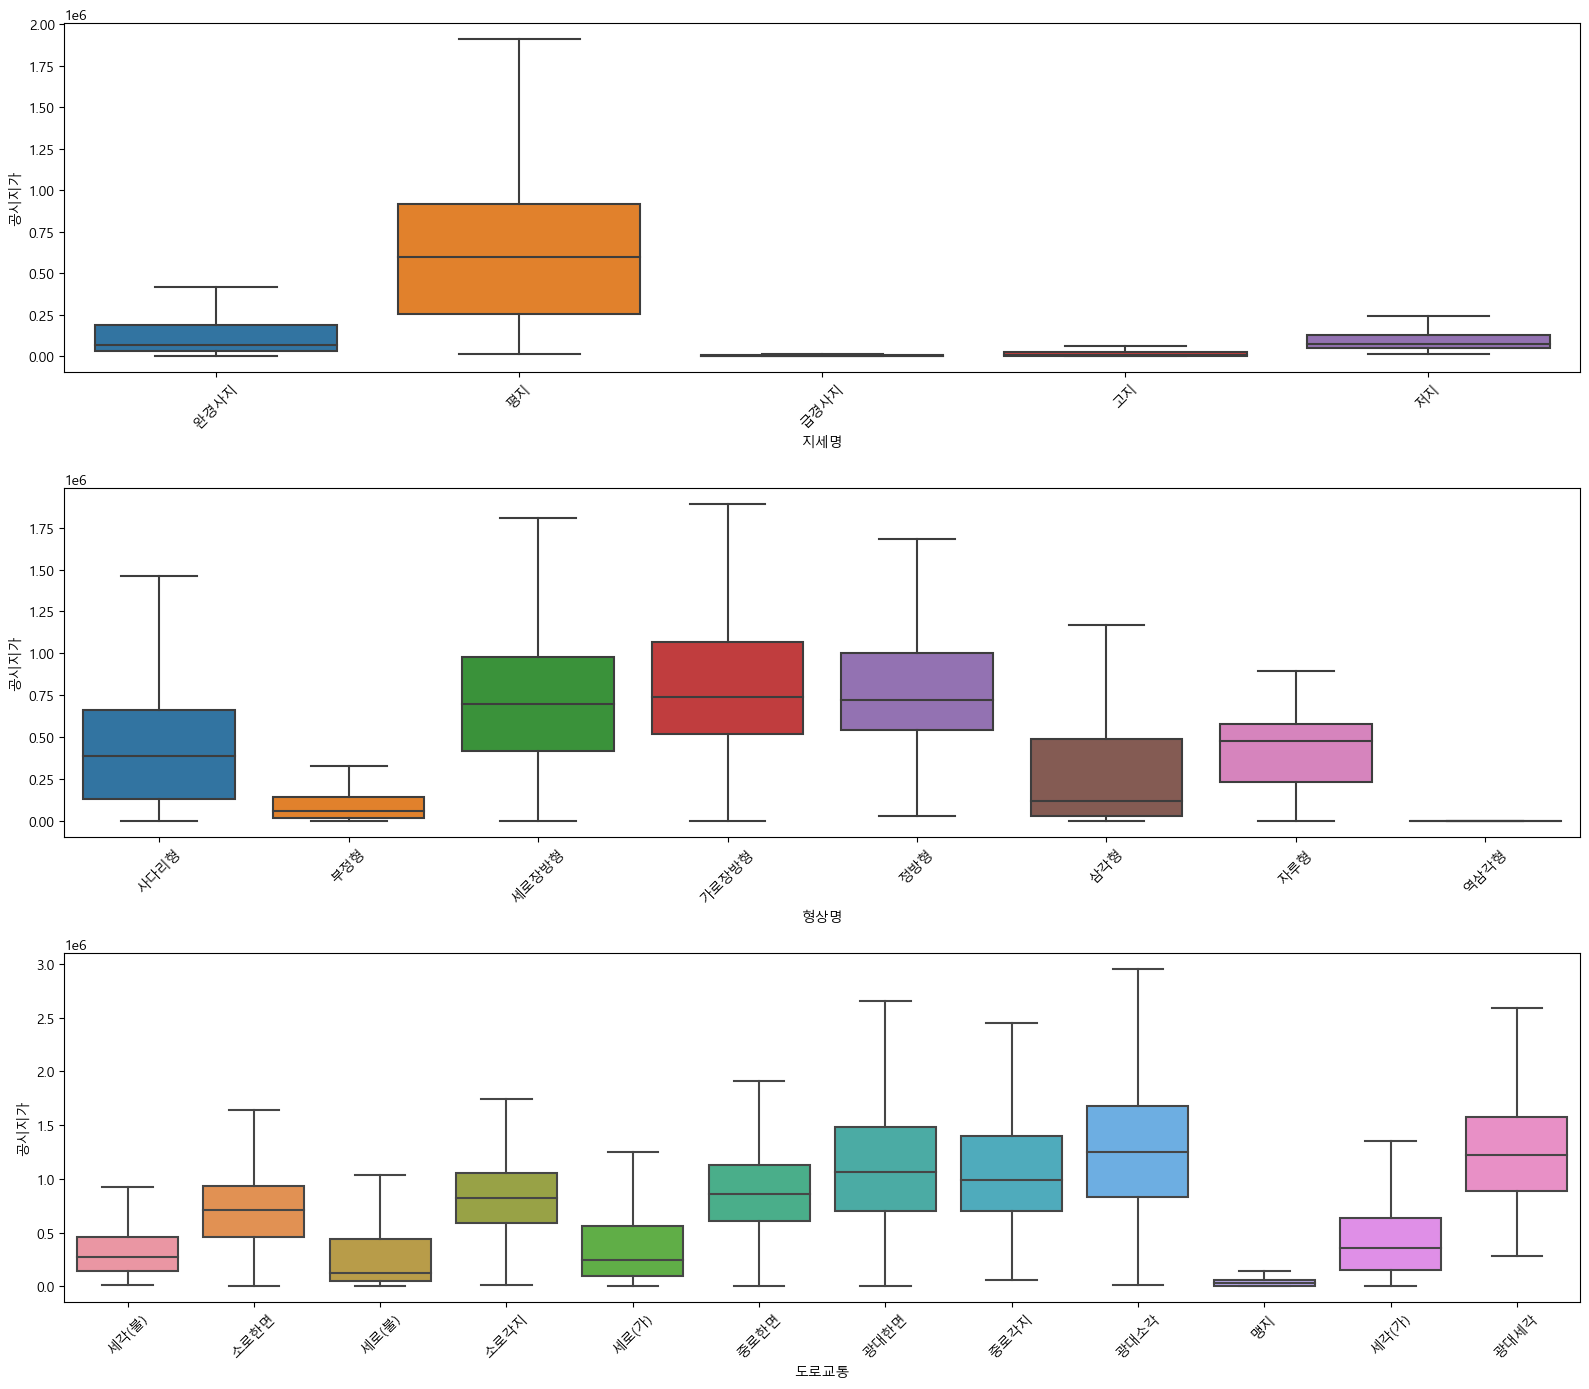

In [14]:
fig, axes = plt.subplots(3, 1, figsize=(16, 14))
lst = ['지세명', '형상명', '도로교통']
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(data=df, x=lst[i], y='공시지가', showfliers=False, ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

In [15]:
# 지세별 평균 공시지가
jise_year = df.groupby(['연도', '지세명'])['공시지가'].mean().reset_index()
jise_year['연도'] = pd.to_datetime(jise_year['연도']).dt.year

# 그래프 그리기
fig = px.bar(jise_year, x='지세명', y='공시지가', animation_frame='연도', range_y=[0, max(jise_year['공시지가'])],
             color='지세명', labels={'지세명': '용도지역', '공시지가': '공시지가'},
             title='지세별 공시지가 변화')
fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['A', 'B', 'C']},
                  title={
    'text': '지세별 평균 공시지가의 변화',
    'y': 0.95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top',
    'font': {'size': 35}
})
fig.update_layout()
fig.show()

In [16]:
# 지세별 평균 공시지가
# 데이터셋 불러오기
jise = df.groupby(['연도', '지세명'])['공시지가'].mean().reset_index()

# 고유한 지세명과 색상 매핑
color_map = {'고지': 'red', '급경사지': 'blue', '완경사지': 'coral', '저지': 'green', '평지': 'turquoise'}

# 바 그래프 그리기
fig = go.Figure()
for jise_name, color in color_map.items():
    jise_data = jise[jise['지세명'] == jise_name]
    fig.add_trace(go.Bar(x=jise_data['연도'], y=jise_data['공시지가'], marker_color=color, name=jise_name))

# 선 그래프 그리기
for jise_name, color in color_map.items():
    jise_data = jise[jise['지세명'] == jise_name]
    fig.add_trace(go.Scatter(x=jise_data['연도'], y=jise_data['공시지가'], mode='lines', line=dict(color=color), name=jise_name))

# 레이아웃 설정
fig.update_layout(
    title={
        'text': '지세별 평균 공시지가의 변화',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 35}
    },
    xaxis_title='연도',
    yaxis_title='공시지가',
    legend_title='지세명'
)

fig.show()

In [17]:
# 지세별 평균 공시지가
shape_year = df.groupby(['연도', '형상명'])['공시지가'].mean().reset_index()
shape_year['연도'] = pd.to_datetime(shape_year['연도']).dt.year

# 그래프 그리기
fig = px.bar(shape_year, x='형상명', y='공시지가', animation_frame='연도', range_y=[0, max(shape_year['공시지가'])],
             color='형상명', labels={'형상명': '용도지역', '공시지가': '공시지가'},
             title='지세별 공시지가 변화')
fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['A', 'B', 'C']},
                  title={
    'text': '형상명별 평균 공시지가의 변화',
    'y': 0.95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top',
    'font': {'size': 35}
})
fig.update_layout()
fig.show()

In [18]:
# 지세별 평균 공시지가
# 데이터셋 불러오기
shapes = df.groupby(['연도', '형상명'])['공시지가'].mean().reset_index()

# 고유한 지세명과 색상 매핑
color_map = {'가로방장형': 'red', '부정형': 'blue', '사다리형': 'green', '세로장방형': 'coral', '정방형': 'turquoise', '자루형':'magenta', '삼각형':'yellow', '역삼각형':'purple'}

# 바 그래프 그리기
fig = go.Figure()
for jise_name, color in color_map.items():
    jise_data = shapes[shapes['형상명'] == jise_name]
    fig.add_trace(go.Bar(x=jise_data['연도'], y=jise_data['공시지가'], marker_color=color, name=jise_name))

# 레이아웃 설정
fig.update_layout(
    title={
        'text': '형상별 평균 공시지가의 변화',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 35}
    },
    xaxis_title='연도',
    yaxis_title='공시지가',
    legend_title='형상명'
)

fig.show()

In [19]:
# 지세별 평균 공시지가
doro_year = df.groupby(['연도', '도로교통'])['공시지가'].mean().reset_index()
doro_year['연도'] = pd.to_datetime(doro_year['연도']).dt.year

# 그래프 그리기
fig = px.bar(doro_year, x='도로교통', y='공시지가', animation_frame='연도', range_y=[0, max(doro_year['공시지가'])],
             color='도로교통', labels={'도로교통': '용도지역', '공시지가': '공시지가'},
             title='지세별 공시지가 변화')
fig.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['A', 'B', 'C']},
                  title={
    'text': '도로교통별 평균 공시지가의 변화',
    'y': 0.95,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top',
    'font': {'size': 35}
})
fig.update_layout()
fig.show()

In [20]:
# 도로교통별 평균 공시지가
# 데이터셋 불러오기
shapes = df.groupby(['연도', '도로교통'])['공시지가'].mean().reset_index()

# 고유한 지세명과 색상 매핑
color_map = {'광대세각': 'red', '광대소각': 'blue', '광대한면': 'green', '소로각지': 'coral', '소로한면': 'turquoise', 
             '중로각지': 'magenta', '중로한면': 'yellow', '맹지': 'purple', '세각(가)': 'pink', '세각(불)': 'gold',
             '세로(가)': 'gray', '세로(불)': 'brown'}

# 바 그래프 그리기
fig = go.Figure()
for jise_name, color in color_map.items():
    jise_data = shapes[shapes['도로교통'] == jise_name]
    fig.add_trace(go.Bar(x=jise_data['연도'], y=jise_data['공시지가'], marker_color=color, name=jise_name))

# 레이아웃 설정
fig.update_layout(
    title={
        'text': '도로교통별 평균 공시지가의 변화',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 35}
    },
    xaxis_title='연도',
    yaxis_title='공시지가',
    legend_title='도로교통'
)

fig.show()

## <b> 3. 모델 학습 및 검증 </b>

> <b> (작업 내용 작성 예) </b> 일반적으로 '공시지가'가 매해 증가한다는 점을 고려하여 선형회귀를 모델로 선정함.

추세 amrima? 합쳐서

In [21]:
# 코드 및 결과

> <b> (작업 내용 작성 예) </b> 2012-2021년 공시지가를 훈련 데이터로 사용하여 선형회귀 모델을 학습함.

In [22]:
# 코드 및 결과

> <b> (작업 내용 작성 예) </b> 훈련 데이터와 테스트 데이터에 대한 정확도는 각각 96%, 83%로 확인됨.

평가지표 - mae 보다는 mean absolute percentage error

In [23]:
# 코드 및 결과

## <b> 4. 결과 분석 및 고찰 </b>

> * 전체 프로젝트 과정을 간략하게 기술
> * 예측 결과를 분석하고 추가 및 보완해야 할 점을 기술

예) 땅을 넓히는 것? 길을 내는 것? 어느 쪽이 더 공시지가가 올라가는지  
더 다듬을 수 있다면, 작업을 더 개선할 수 있을만한 사안